<a href="https://colab.research.google.com/github/hiydavid/tfdev_learning/blob/main/ZTM/notebooks/tfdev_03_computer_vision_convolutional_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. Computer Vision and Convolutional Neural Networks

In this notebook we're going to cover:
* Getting a dataset to work with
* Architecture of a convolutional neural network (CNN)
* And end-to-end binary image classification problem
* Steps in modeling with CNNs
* An end-to-end multiclass image classificatoin problem
* Making predicitons on our own custom images

# Get Food101 Data

In [1]:
# load library
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# get data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-03-10 07:00:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   125MB/s    in 0.8s    

2022-03-10 07:00:56 (125 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
# see how many files are in the steak and pizza folder
print(len(os.listdir("pizza_steak/train/steak")))
print(len(os.listdir("pizza_steak/train/pizza")))

750
750


In [4]:
# View an image
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}")
    return img

Image shape: (384, 512, 3)


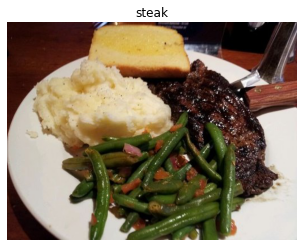

In [5]:
# view an random imag
img = view_random_image(
    target_dir="pizza_steak/train/",
    target_class="steak"
)

Image shape: (384, 512, 3)


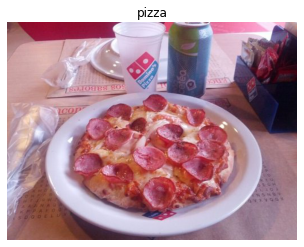

In [6]:
# view an random imag
img = view_random_image(
    target_dir="pizza_steak/train/",
    target_class="pizza"
)

In [7]:
# get tensor's shape
tf.constant(img).shape

TensorShape([384, 512, 3])

# An End-to-End Example

In [8]:
# set seed
tf.random.set_seed(42)

In [9]:
# preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# setup path
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

In [11]:
# import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
# build a CNN model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10, kernel_size=3, activation='relu', 
        input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_0.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

hist_0 = model_0.fit(
    train_data, 
    epochs=5, 
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 25s 270ms/step - loss: 0.5874 - accuracy: 0.6880 - val_loss: 0.4525 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 12s 249ms/step - loss: 0.4270 - accuracy: 0.7940 - val_loss: 0.3319 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 11s 244ms/step - loss: 0.3873 - accuracy: 0.8353 - val_loss: 0.3497 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3474 - accuracy: 0.8560 - val_loss: 0.3304 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 12s 257ms/step - loss: 0.3062 - accuracy: 0.8727 - val_loss: 0.2905 - val_accuracy: 0.8860


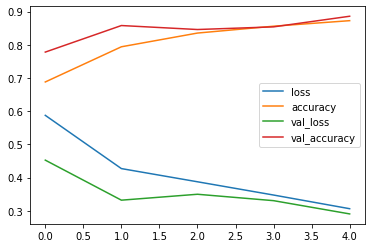

In [13]:
# plot losses
pd.DataFrame(hist_0.history).plot()
plt.show()

In [14]:
# view model
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# View & Preprocess Image Data

Image shape: (512, 512, 3)
Image shape: (308, 512, 3)


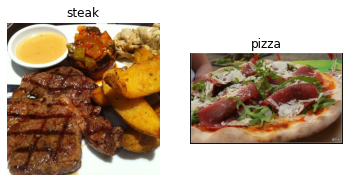

In [16]:
# view pizza vs steak images randomly
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [17]:
# define directory datasewt paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [18]:
# create train and test data generator and rescale the data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
# import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
# get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [31]:
# how many batches are there?
len(train_data), 1500/32

(47, 46.875)

In [32]:
# check image
images[0]

array([[[0.95294124, 0.9176471 , 0.882353  ],
        [0.9568628 , 0.9215687 , 0.8941177 ],
        [0.94117653, 0.909804  , 0.8980393 ],
        ...,
        [0.9058824 , 0.86274517, 0.79215693],
        [0.9490197 , 0.89019614, 0.8078432 ],
        [0.94117653, 0.87843144, 0.78823537]],

       [[0.9686275 , 0.9333334 , 0.8980393 ],
        [0.93725497, 0.909804  , 0.87843144],
        [0.9490197 , 0.9176471 , 0.9058824 ],
        ...,
        [0.8862746 , 0.8352942 , 0.7607844 ],
        [0.90196085, 0.8431373 , 0.75294125],
        [0.95294124, 0.89019614, 0.79215693]],

       [[0.95294124, 0.92549026, 0.8862746 ],
        [0.9686275 , 0.94117653, 0.909804  ],
        [0.95294124, 0.9215687 , 0.909804  ],
        ...,
        [0.8980393 , 0.83921576, 0.7568628 ],
        [0.9058824 , 0.8431373 , 0.74509805],
        [0.9058824 , 0.83921576, 0.7294118 ]],

       ...,

       [[0.854902  , 0.7843138 , 0.7686275 ],
        [0.83921576, 0.7803922 , 0.7607844 ],
        [0.85098046, 0

In [33]:
# see what first batch of label look slike
labels

array([1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.],
      dtype=float32)

# Create A Baseline CNN Model